In [1]:
import pandas as pd
df = pd.read_csv('house_data/new_data.csv')
# for i in df.columns:
#     print(i)
df['交易年月日'] = pd.to_datetime(df['交易年月日'])
df = df[df['交易年月日'].notnull()]
df['year'] = df['交易年月日'].apply(lambda s: s.year)

<AxesSubplot:xlabel='year'>

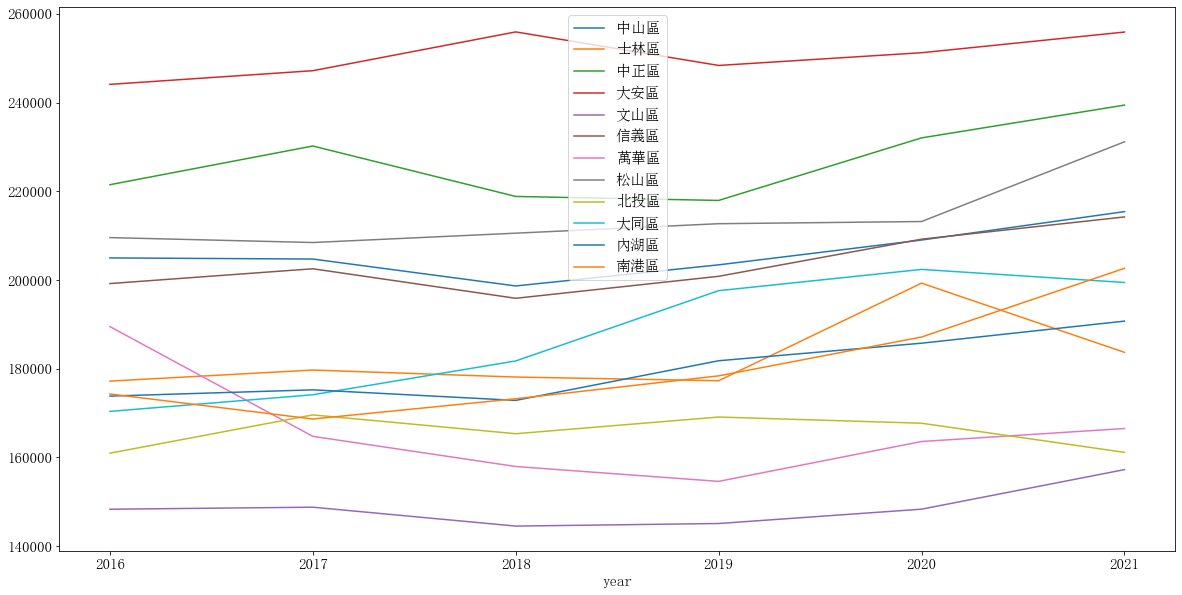

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = (20,10)

prices = {} # set 相當於取出 unique的資料，因為set會把重複值剔除，且沒有順序
for district in set(df['鄉鎮市區']):
    cond = (
        (df['主要用途'] == '住家用')
        & (df['鄉鎮市區'] == district)
        & (df['單價元平方公尺'] < df["單價元平方公尺"].quantile(0.95))
        & (df['單價元平方公尺'] > df["單價元平方公尺"].quantile(0.05))
        )
    
    groups = df[cond]['year']
    
    prices[district] = df[cond]['單價元平方公尺'].astype(float).groupby(groups).mean().loc[2014:]
    
price_history = pd.DataFrame(prices)
price_history.plot() 

<AxesSubplot:xlabel='year'>

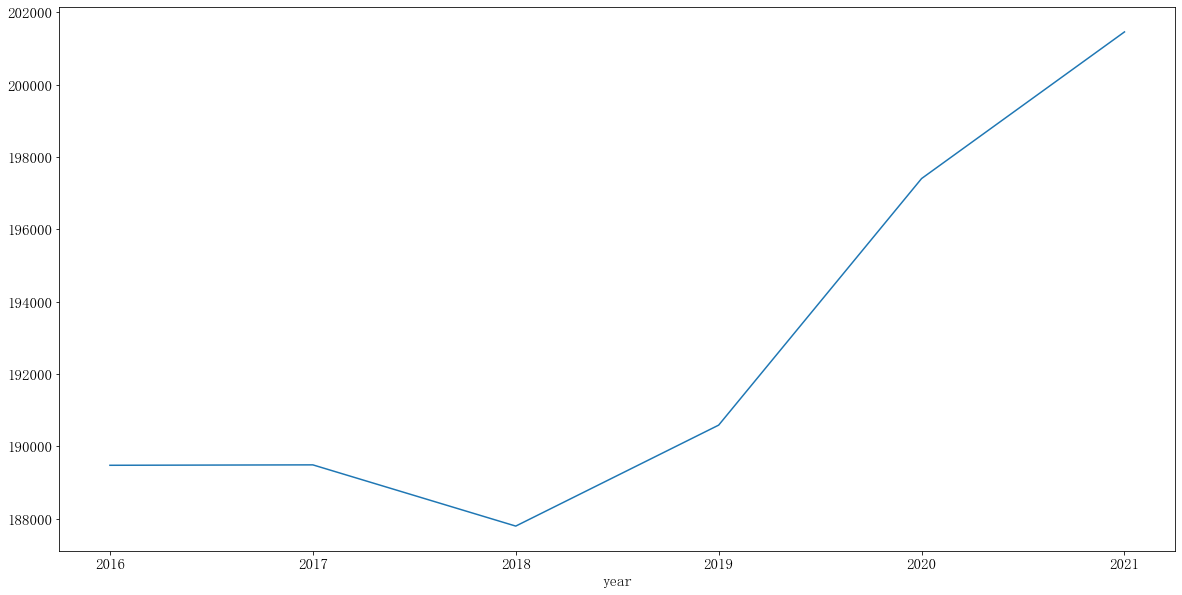

In [8]:
# 整體住宅區隨年份變化
price_history.mean(axis=1).plot()

In [11]:
price_history#.to_csv('graphic_data/住家用_price.csv',encoding='big5') # cond groups

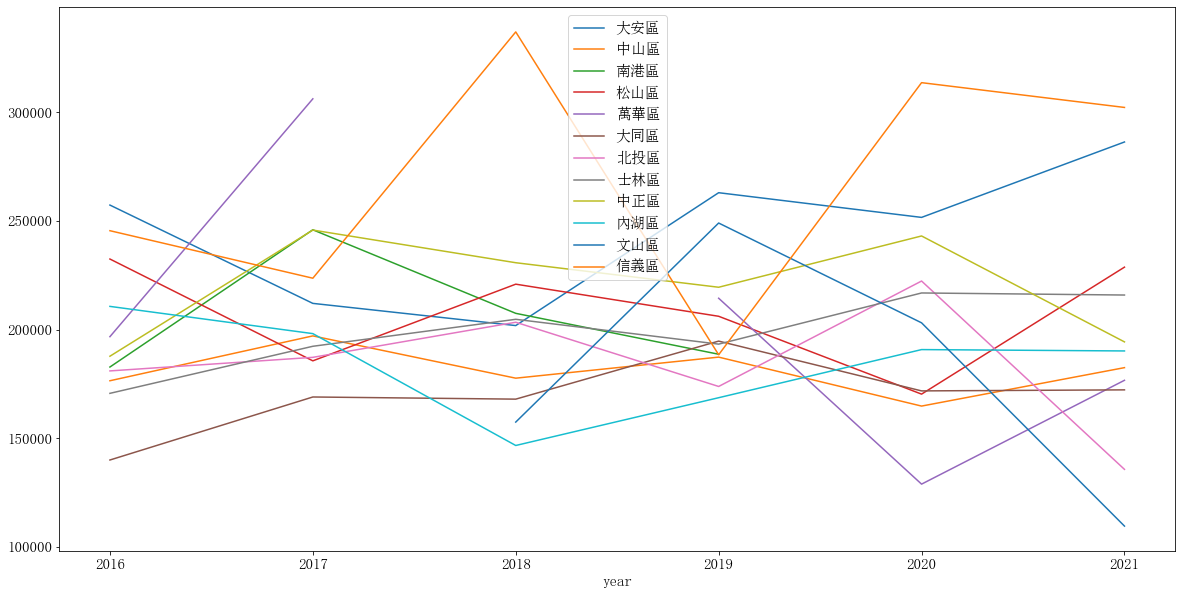

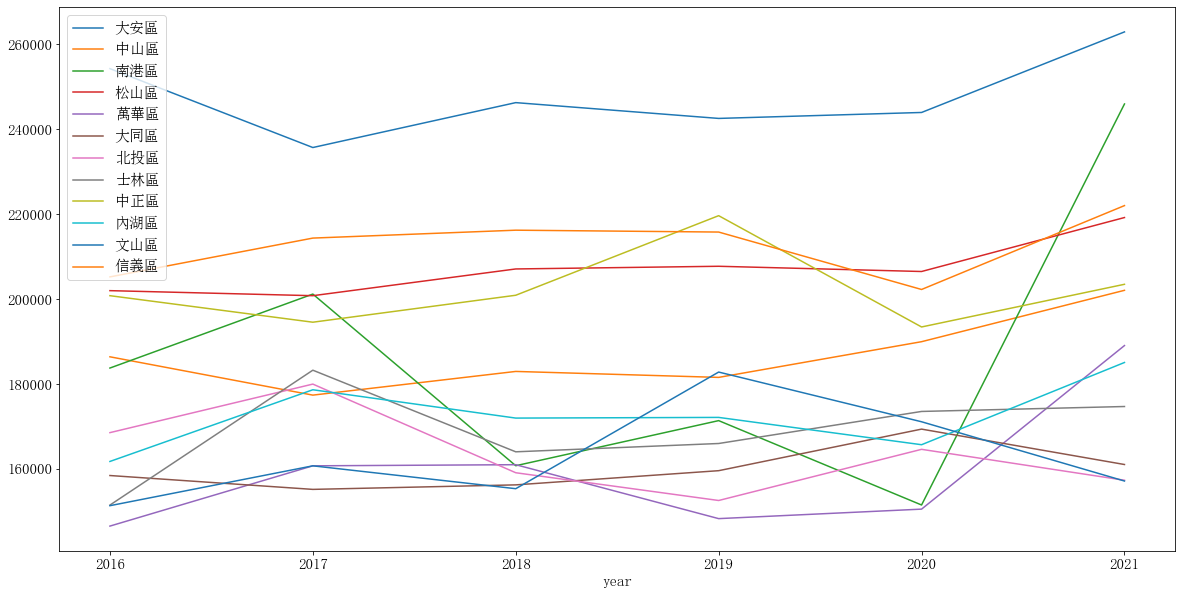

In [15]:
def plot_by_year(p='住家用'):
    prices = {} # set 相當於取出 unique的資料，因為set會把重複值剔除，且沒有順序
    for district in set(df['鄉鎮市區']):
        cond = (
            (df['主要用途'] == p)
            & (df['鄉鎮市區'] == district)
            & (df['單價元平方公尺'] < df["單價元平方公尺"].quantile(0.95))
            & (df['單價元平方公尺'] > df["單價元平方公尺"].quantile(0.05))
            )

        groups = df[cond]['year']

        prices[district] = df[cond]['單價元平方公尺'].astype(float).groupby(groups).mean().loc[2014:]

    price_history = pd.DataFrame(prices)
    price_history.plot()
    return price_history

住商用 = plot_by_year('住商用')
商業用 = plot_by_year('商業用')

In [12]:
# 住商用.to_csv('graphic_data/住商用_price.csv',encoding='big5')
# 商業用.to_csv('graphic_data/商業用_price.csv',encoding='big5')

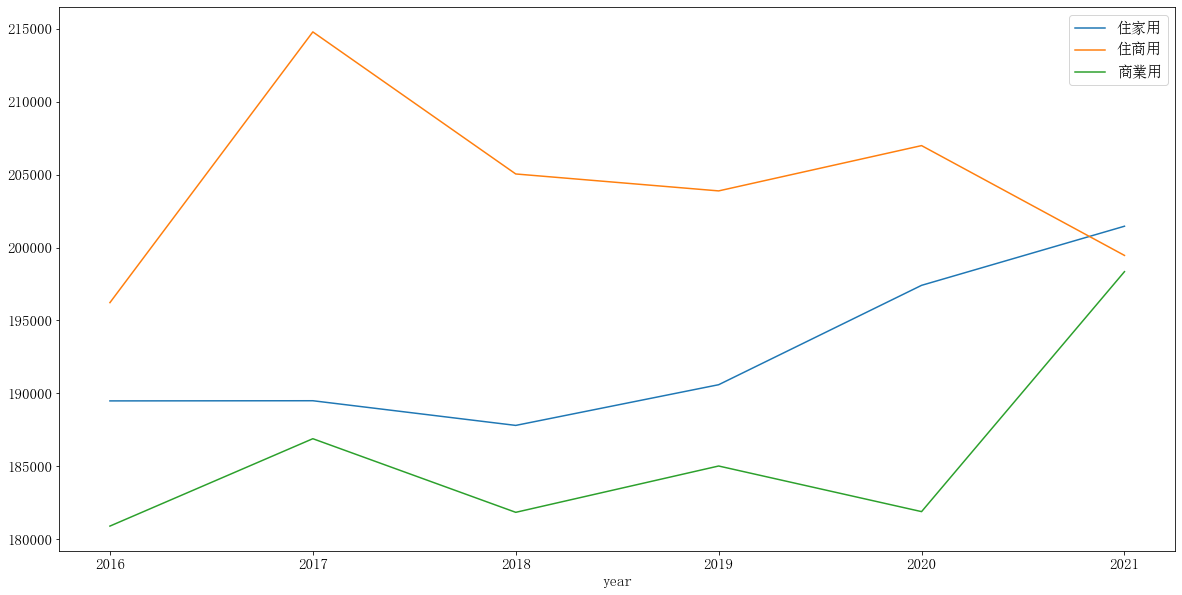

In [30]:
plt.rcParams['font.size'] = 15
price_history.mean(axis=1).plot(label='住家用') # blue
住商用.mean(axis=1).plot(label='住商用') # yellow
商業用.mean(axis=1).plot(label='商業用') # green
plt.legend()

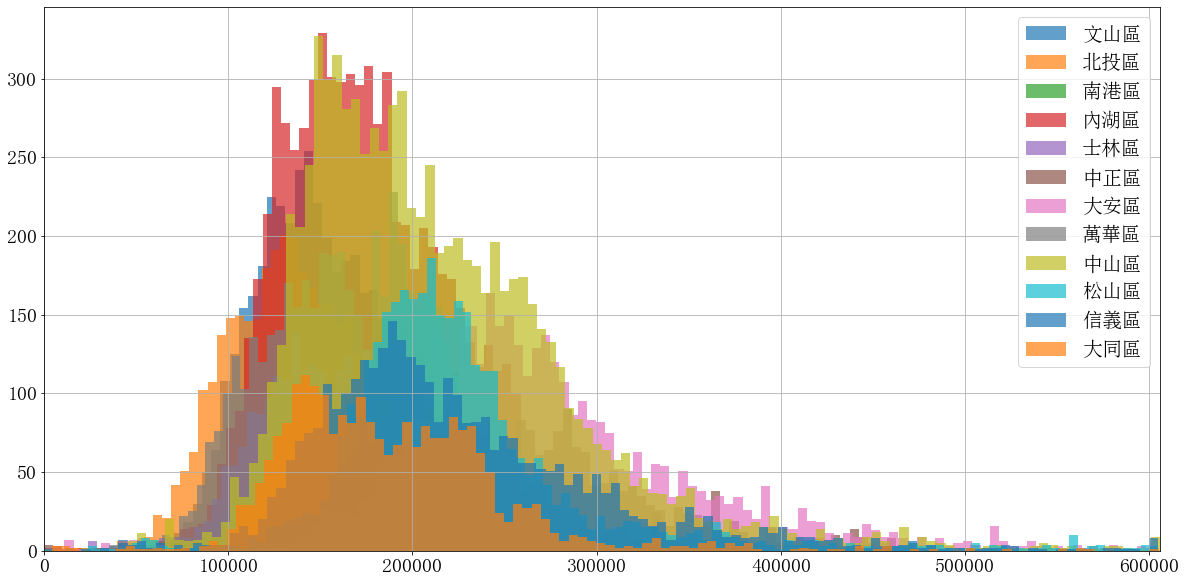

In [32]:
# 地區分布圖
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (20,10)

for district in set(df['鄉鎮市區']):
    dfdistrict = df[df['鄉鎮市區'] == district]
    dfdistrict['單價元平方公尺'][dfdistrict['單價元平方公尺'] < 2000000/3.3].hist(bins=120, alpha=0.7)

plt.xlim(0, 2000000/3.3)
plt.legend(set(df['鄉鎮市區']))

<AxesSubplot:xlabel='year'>

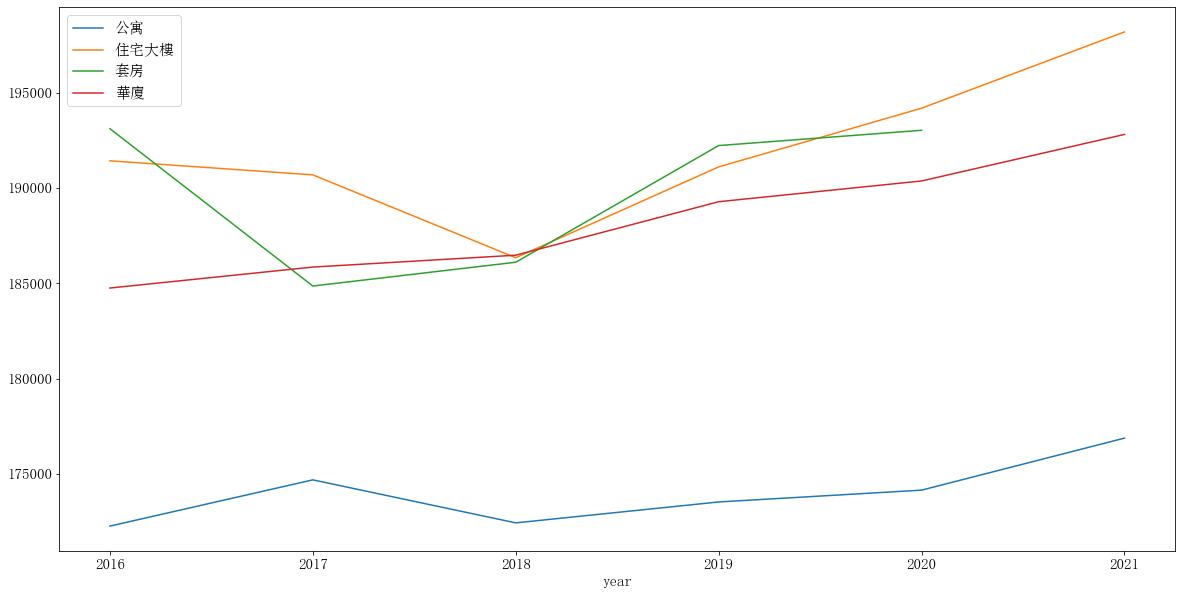

In [17]:
# 不同建物房價隨時間變化 ## 只看住家用
building_type_prices = {}
for building_type in set(df['建物型態']):
    cond = (
        (df['主要用途'] == '住家用')
        & (df['單價元平方公尺'] < df["單價元平方公尺"].quantile(0.8))
        & (df['單價元平方公尺'] > df["單價元平方公尺"].quantile(0.2))
        & (df['建物型態'] == building_type)
        )
    building_type_prices[building_type] = df[cond]['單價元平方公尺'].groupby(df[cond]['year']).mean().loc[2014:]
build = pd.DataFrame(building_type_prices)[['公寓', '住宅大樓', '套房', '華廈']]
build.plot()

In [20]:
# build.to_csv('graphic_data/bulding_type_住家用.csv',encoding='big5')

<AxesSubplot:xlabel='year'>

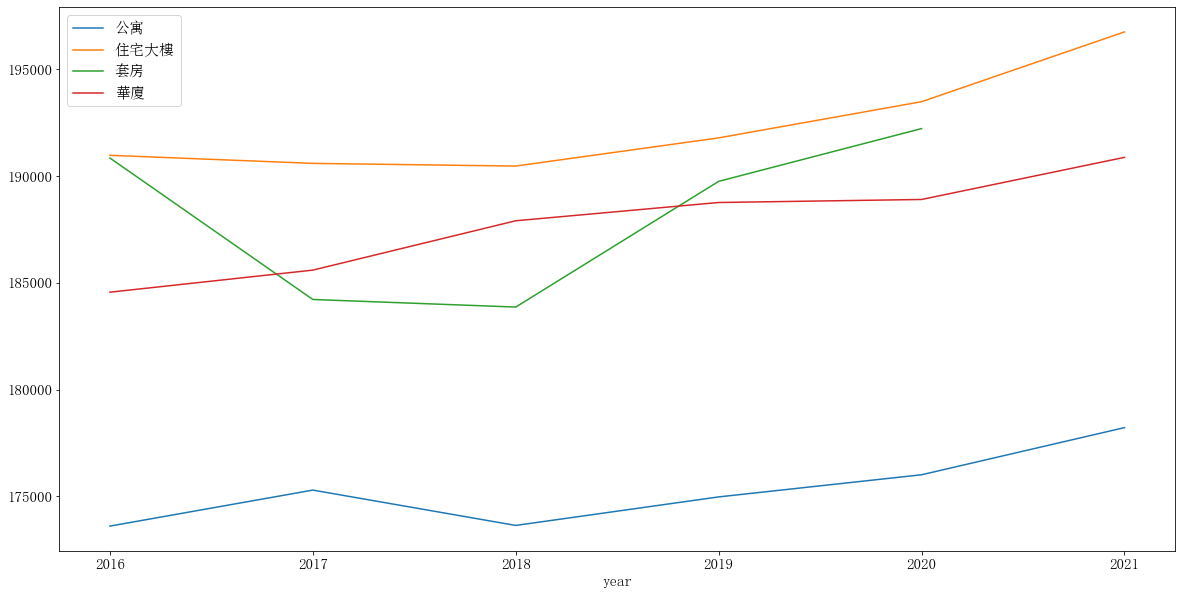

In [3]:
building_type_prices = {}
for building_type in set(df['建物型態']):
    cond = (
        (df['單價元平方公尺'] < df["單價元平方公尺"].quantile(0.8))
        & (df['單價元平方公尺'] > df["單價元平方公尺"].quantile(0.2))
        & (df['建物型態'] == building_type)
        )
    building_type_prices[building_type] = df[cond]['單價元平方公尺'].groupby(df[cond]['year']).mean().loc[2014:]
build_2 = pd.DataFrame(building_type_prices)[['公寓', '住宅大樓', '套房', '華廈']]
build_2.plot()

In [4]:
#build_2.to_csv('graphic_data/building_type_不限制.csv',encoding='big5')